 # **<span style="font-size:larger;"> 03: <span style="color:blue">Model Selection & Evaluation</span>** #

#### Imports and Read-Ins:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import xgboost
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

#from xgboost import XGBClassifier
import pickle

import warnings
warnings.filterwarnings("ignore")

In [4]:
import random
random.seed(42)

In [5]:
df = pd.read_csv('C:/Users/jvicm/Desktop/Phishing-URL-Detection-main/url_updated.csv')

# I. Model Setup

### Baseline

In [6]:
df['phishing'].value_counts(normalize=True)

0    0.500547
1    0.499453
Name: phishing, dtype: float64

### Train Test Split

In [7]:
X = df.drop(columns=['url', 'protocol', 'domain', 'path', 'query', 'fragment','phishing'])

y = df['phishing']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42, stratify = y )

### Scale Data

In [8]:
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)

X_test_sc = ss.transform(X_test)

# II. Model Selection

We will run a single model for each of the following 9 classifiers:

- Stochastic Gradient Descent Classifier
- Logistic Regression
- AdaBoost
- Gradient Boost
- Decision Tree Classifier
- Bagging Classifier
- K-Nearest Neighbors Classifier
- Extra Trees Classifier
- Random Forest Classifier

Two functions are built to help aid our model selection process. One for scaled data and one for unscaled data.

In [9]:
def get_scores_sc(model):
    
    # instantiate model
    model = model()
    
    # fit to scaled data
    model.fit(X_train_sc, y_train)
    
    # make predictions
    preds = model.predict(X_test_sc)

    # print results
    print(f'{model} Training Score: {model.score(X_train_sc, y_train)}')
    print(f'{model} Testing Score: {model.score(X_test_sc, y_test)}')
    print()
    print(classification_report(y_test, preds))
    print(confusion_matrix(y_test, preds))

    return

In [10]:
def get_scores(model):
    
    # instantiate model
    model = model()
    
    # fit to data
    model.fit(X_train, y_train)
    
    # make predictions
    preds = model.predict(X_test)

    # print results
    print(f'{model} Training Score: {model.score(X_train, y_train)}')
    print(f'{model} Testing Score: {model.score(X_test, y_test)}')
    print()
    print(classification_report(y_test, preds))
    print(confusion_matrix(y_test, preds))

    return

In [11]:
get_scores_sc(SGDClassifier)

SGDClassifier() Training Score: 0.8027219395557038
SGDClassifier() Testing Score: 0.7991992993869635

              precision    recall  f1-score   support

           0       0.75      0.89      0.82     12003
           1       0.87      0.71      0.78     11976

    accuracy                           0.80     23979
   macro avg       0.81      0.80      0.80     23979
weighted avg       0.81      0.80      0.80     23979

[[10701  1302]
 [ 3513  8463]]


In [12]:
get_scores(AdaBoostClassifier)

AdaBoostClassifier() Training Score: 0.8599271554480497
AdaBoostClassifier() Testing Score: 0.8570415780474582

              precision    recall  f1-score   support

           0       0.83      0.89      0.86     12003
           1       0.88      0.82      0.85     11976

    accuracy                           0.86     23979
   macro avg       0.86      0.86      0.86     23979
weighted avg       0.86      0.86      0.86     23979

[[10705  1298]
 [ 2130  9846]]


In [13]:
get_scores(GradientBoostingClassifier)

GradientBoostingClassifier() Training Score: 0.8755108849778964
GradientBoostingClassifier() Testing Score: 0.8739313566036949

              precision    recall  f1-score   support

           0       0.85      0.91      0.88     12003
           1       0.90      0.84      0.87     11976

    accuracy                           0.87     23979
   macro avg       0.88      0.87      0.87     23979
weighted avg       0.88      0.87      0.87     23979

[[10937  1066]
 [ 1957 10019]]


In [16]:
get_scores_sc(LogisticRegression)

LogisticRegression() Training Score: 0.7967164345094114
LogisticRegression() Testing Score: 0.7918595437674631

              precision    recall  f1-score   support

           0       0.75      0.87      0.81     12003
           1       0.85      0.71      0.77     11976

    accuracy                           0.79     23979
   macro avg       0.80      0.79      0.79     23979
weighted avg       0.80      0.79      0.79     23979

[[10502  1501]
 [ 3490  8486]]


In [17]:
get_scores_sc(KNeighborsClassifier)

KNeighborsClassifier() Training Score: 0.9158395195595963
KNeighborsClassifier() Testing Score: 0.888068726802619

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     12003
           1       0.91      0.86      0.89     11976

    accuracy                           0.89     23979
   macro avg       0.89      0.89      0.89     23979
weighted avg       0.89      0.89      0.89     23979

[[10964  1039]
 [ 1645 10331]]


In [18]:
get_scores(DecisionTreeClassifier)

DecisionTreeClassifier() Training Score: 0.9523869102232602
DecisionTreeClassifier() Testing Score: 0.8828975353434255

              precision    recall  f1-score   support

           0       0.86      0.91      0.89     12003
           1       0.91      0.85      0.88     11976

    accuracy                           0.88     23979
   macro avg       0.88      0.88      0.88     23979
weighted avg       0.88      0.88      0.88     23979

[[10976  1027]
 [ 1781 10195]]


In [19]:
get_scores(BaggingClassifier)

BaggingClassifier() Training Score: 0.9489671087385659
BaggingClassifier() Testing Score: 0.8884857583719088

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     12003
           1       0.91      0.86      0.89     11976

    accuracy                           0.89     23979
   macro avg       0.89      0.89      0.89     23979
weighted avg       0.89      0.89      0.89     23979

[[10966  1037]
 [ 1637 10339]]


In [20]:
get_scores(ExtraTreesClassifier)

ExtraTreesClassifier() Training Score: 0.9523869102232602
ExtraTreesClassifier() Testing Score: 0.8957004045206222

              precision    recall  f1-score   support

           0       0.87      0.92      0.90     12003
           1       0.92      0.87      0.89     11976

    accuracy                           0.90     23979
   macro avg       0.90      0.90      0.90     23979
weighted avg       0.90      0.90      0.90     23979

[[11102   901]
 [ 1600 10376]]


In [21]:
get_scores(RandomForestClassifier)

RandomForestClassifier() Training Score: 0.9523730085912087
RandomForestClassifier() Testing Score: 0.8963259518745569

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     12003
           1       0.92      0.87      0.89     11976

    accuracy                           0.90     23979
   macro avg       0.90      0.90      0.90     23979
weighted avg       0.90      0.90      0.90     23979

[[11032   971]
 [ 1515 10461]]


Random Forest Classifier will be used for model deployment as it had the highest testing score, as well as the highest recall score.

# III. Model Optimization

Using `RandomizedSearchCV`, we are able to find the best parameters for the model.

In [22]:
rfc = RandomForestClassifier()
rfc_params = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600]}

rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = rfc_params, cv = 3, verbose=2, random_state=42, 
                                n_jobs = -1)
rfc_random.fit(X_train, y_train)
print(f'Best Parameters: {rfc_random.best_params_}')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 40, 'bootstrap': True}


Training Score: 0.9438513081435761
Testing Score: 0.8999958296843071

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     12003
           1       0.92      0.88      0.90     11976

    accuracy                           0.90     23979
   macro avg       0.90      0.90      0.90     23979
weighted avg       0.90      0.90      0.90     23979

[[11088   915]
 [ 1483 10493]]


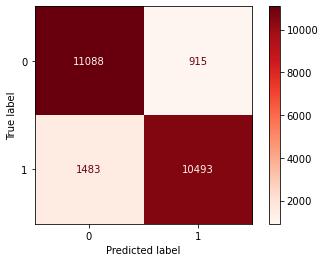

In [23]:
rfc = RandomForestClassifier(n_estimators = 1400, min_samples_split= 5, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 90, 
                             bootstrap= True, n_jobs= -1, random_state=42)
rfc.fit(X_train, y_train)

preds = rfc.predict(X_test)
print(f'Training Score: {rfc.score(X_train, y_train)}')
print(f'Testing Score: {rfc.score(X_test, y_test)}')
print()
print(classification_report(y_test,preds))
print(confusion_matrix(y_test, preds))

cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rfc.classes_)
disp.plot(cmap = 'Reds', values_format='');

In [24]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

print("Accuracy: ", (tn + tp) / (tn + fp + fn + tp))
print('Misclassification Rate: ', (fp+fn)/(tp+fp+tn+fn))
print("Recall: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))
print("Precision: ", tp / (tp + fp))

Accuracy:  0.8999958296843071
Misclassification Rate:  0.10000417031569289
Recall:  0.8761690046760187
Specificity:  0.9237690577355661
Precision:  0.9197931276297335


### Pickeling Model

We will pickel this model in order to use for deployment.

In [26]:
pickle.dump(rfc, open('C:/Users/jvicm/Desktop/Phishing-URL-Detection-main/rfc.pkl','wb'))

# IV. Closer Look

A closer look into the importance of each feature can be analyzed.

In [27]:
# Create feature list
feature_list = list(X.columns)

# Get numerical feature importances
importances = list(rfc.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: url_length           Importance: 0.197
Variable: path_length          Importance: 0.152
Variable: qty_dot_domain       Importance: 0.123
Variable: domain_length        Importance: 0.119
Variable: qty_dot_url          Importance: 0.067
Variable: query_length         Importance: 0.043
Variable: qty_dot_path         Importance: 0.041
Variable: qty_slash_url        Importance: 0.04
Variable: qty_slash_path       Importance: 0.034
Variable: qty_equal_url        Importance: 0.029
Variable: qty_hyphen_url       Importance: 0.027
Variable: qty_questionmark_url Importance: 0.023
Variable: qty_and_url          Importance: 0.016
Variable: qty_equal_query      Importance: 0.015
Variable: qty_hyphen_domain    Importance: 0.013
Variable: qty_hyphen_path      Importance: 0.013
Variable: qty_and_query        Importance: 0.008
Variable: qty_dot_query        Importance: 0.006
Variable: qty_tilde_url        Importance: 0.005
Variable: qty_equal_path       Importance: 0.005
Variable: qty_tilde_p